<h1 align = "center">Prediction Using Decision Tree Algorithm</h1>
<br>
<h3 align = "center">Author - Naman Talwar</h3>
<br>

<h3>Importing The Required Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<br>
<h3>Importing The Dataset</h3>

In [2]:
data = pd.read_csv("Iris.csv")
data = data.drop("Id",axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<br>
<h3>Visualising The Data</h3>

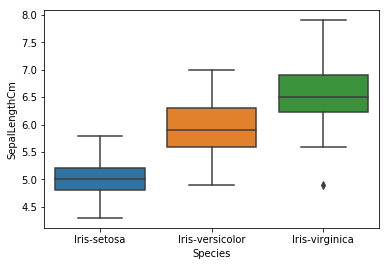

In [6]:
sns.boxplot(data = data, x= "Species", y= "SepalLengthCm")

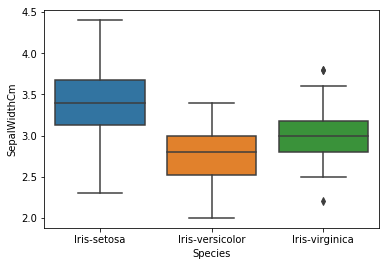

In [7]:
sns.boxplot(data = data, x  = "Species", y = "SepalWidthCm")

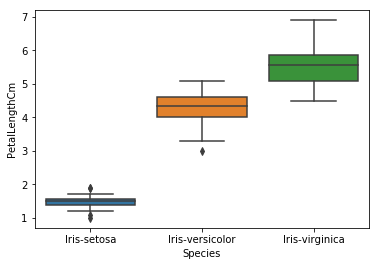

In [8]:
sns.boxplot(data =data , x ="Species",y = "PetalLengthCm")

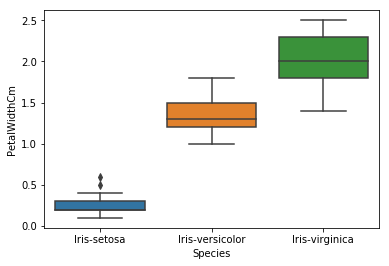

In [9]:
sns.boxplot(data =data, x= "Species",y ="PetalWidthCm")

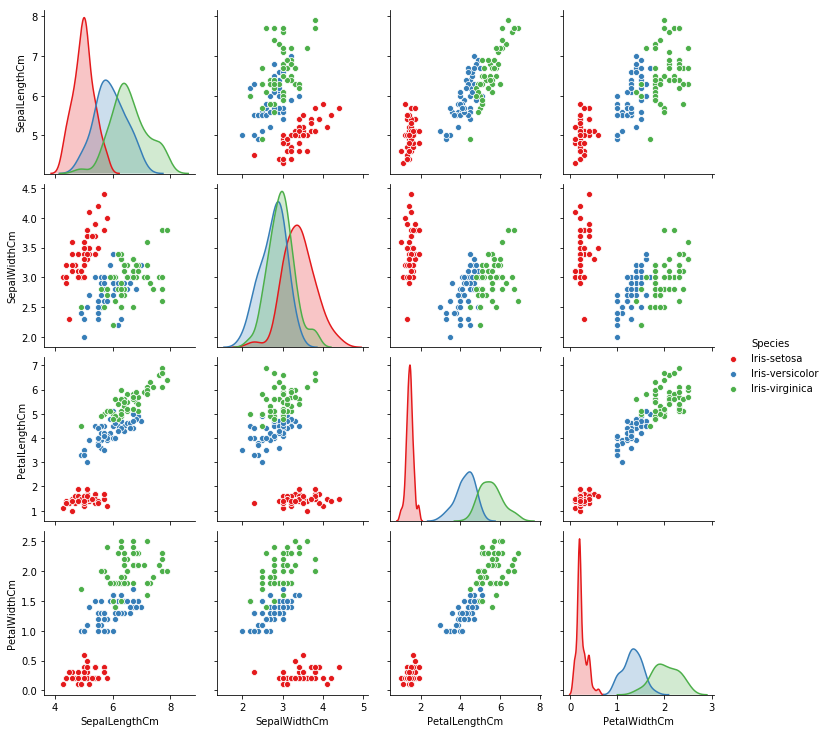

In [10]:
sns.pairplot(data = data, hue = "Species" , palette = "Set1")

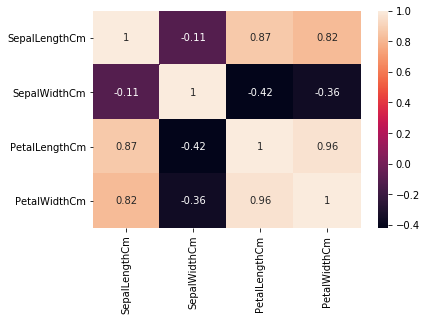

In [11]:
sns.heatmap(data.corr(),annot = True)

In [12]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data["Species"] = l.fit_transform(data["Species"])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [30]:
x = data.drop(["Species"],axis = 1)
y = data["Species"] 

<br>
<h3>Splitting The Data into Training and Testing Dataset</h3>

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)    

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier=DecisionTreeClassifier(random_state=20)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

In [16]:
y_pred=classifier.predict(x_test)

In [17]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  1 19]]


In [18]:
accuracy_score=accuracy_score(y_test,y_pred)
print("Accuracy Score:\n",accuracy_score)

Accuracy Score:
 0.9666666666666667


<br>
<h3>Visualising the Decision Tree</h3>

In [22]:
from sklearn.tree import plot_tree

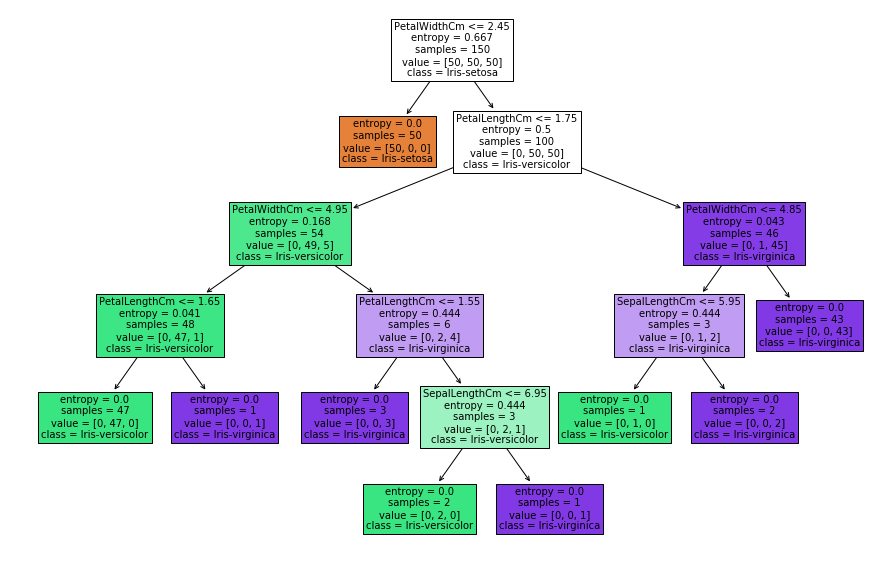

In [29]:
classifier1 = DecisionTreeClassifier().fit(x,y)
plt.figure(figsize = (15,10))
tree = plot_tree(classifier1,feature_names = f_n,class_names = c_n,filled = True)